# Final

This notebook takes the best outcomes of the previous experiments and puts them all into one note book

## Load Data

In [1]:
!pip install transformers nltk

     |████████████████████████████████| 2.1MB 5.2MB/s 
     |████████████████████████████████| 3.3MB 22.9MB/s 
     |████████████████████████████████| 901kB 41.2MB/s 


In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import tensorflow as tf
from google.colab import drive
import os
import bert
import trainer
import utils
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import json

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [3]:
drive.mount('/gdrive')
os.listdir('/gdrive/MyDrive/data')

Mounted at /gdrive


['test.csv',
 'sample_submission.csv',
 'train.csv',
 'saved_models',
 'training_resultsSimpleBertForSequenceClassification.json',
 'training_resultsModifiedBertForSequenceClassification.json',
 'utils.py',
 'trainer.py',
 'bert.py',
 'training_results_ModifiedBertForSequenceClassification.json',
 'training_results_ModifiedBertForSequenceClassification_1.json',
 'training_results_BertToSingleLayerNeuralNetwork_1.json',
 'training_results_SimpleBertForSequenceClassification_1.json',
 'preprocessing_exp',
 'tokenizer_exp',
 'val.csv',
 'data.csv',
 'hyperparameter_exp',
 'training_exp']

In [4]:
dataset_location = '/gdrive/MyDrive/data'
path = "/gdrive/MyDrive/data/final"
use_tpu = True
train = True

In [5]:
if not os.path.exists(path):
    os.mkdir(path)

In [6]:
dataset = pd.read_csv("{}/data.csv".format(dataset_location))
validation_dataset = pd.read_csv("{}/val.csv".format(dataset_location))

In [7]:
dataset.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0
1,21,Deciphering noise amplification and reduction ...,The impact of random fluctuations on the dyn...,0,0,0,0,1,0
2,34,An Unsupervised Homogenization Pipeline for Cl...,Electronic health records (EHR) contain a la...,0,0,0,0,1,0
3,42,Are multi-factor Gaussian term structure model...,"In this paper, we empirically study models f...",0,0,0,0,0,1
4,56,Competing evolutionary paths in growing popula...,Investigating the emergence of a particular ...,0,0,0,0,1,0


In [8]:
dataset["text"] = dataset["TITLE"] + " ." + dataset["ABSTRACT"]
validation_dataset["text"] = validation_dataset["TITLE"] + " ." + validation_dataset["ABSTRACT"]
dataset.head(1)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0,$\mathcal{R}_{0}$ fails to predict the outbrea...


In [9]:
classes = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]

In [10]:
Y = dataset[classes].values
Y_val = validation_dataset[classes].values

In [11]:
if use_tpu:
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
    except ValueError:
        strategy = tf.distribute.get_strategy() # for CPU and single GPU
        print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.87.205.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.87.205.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Train

In [12]:
class ModelConfig:
    max_length = 200
    bert_name = "bert-base-uncased"
    num_labels = 6
    optimizer = tf.keras.optimizers.Adam(0.00001)
    loss_function = "binary_crossentropy"
    metrics = ["accuracy"]


class TrainerConfig:
    test_size = 0.2
    fold_count = 4
    batch_size = 64
    epochs = 5

In [13]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
version = "final"
if use_tpu:
    with strategy.scope():
        model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.KFoldTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history = trainer_methodology.train()
    training_history = utils.training_history_to_dict(training_history)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history = json.load(file)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5


235/235 [==============================] - ETA: 0s - loss: 0.2916 - accuracy: 0.6705WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


235/235 [==============================] - 161s 367ms/step - loss: 0.2913 - accuracy: 0.6707 - val_loss: 0.1834 - val_accuracy: 0.7250
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 0.1722 - accuracy: 0.7681 - val_loss: 0.1694 - val_accuracy: 0.7539
Epoch 3/5
235/235 [==============================] - 33s 140ms/step - loss: 0.1497 - accuracy: 0.7855 - val_loss: 0.1684 - val_accuracy: 0.7717
Epoch 4/5
235/235 [==============================] - 33s 141ms/step - loss: 0.1324 - accuracy: 0.8025 - val_loss: 0.1701 - val_accuracy: 0.7533
Epoch 5/5
235/235 [==============================] - 34s 143ms/step - loss: 0.1156 - accuracy: 0.8188 - val_loss: 0.1859 - val_accuracy: 0.7210
Epoch 1/5
235/235 [==============================] - 34s 143ms/step - loss: 0.1284 - accuracy: 0.8059 - val_loss: 0.0879 - val_accuracy: 0.8442
Epoch 2/5
235/235 [==============================] - 33s 141ms/step - loss: 0.1069 - accuracy: 0.8241 - val_loss: 0.0838 - val_accuracy: 0.8207
E

## Evaluate

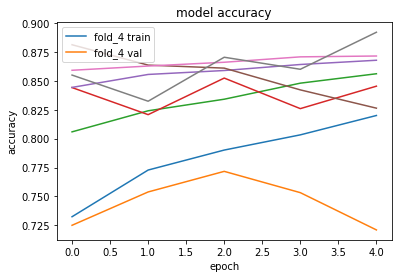

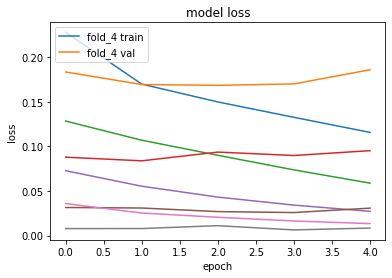

In [14]:
model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
model.version = "final"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, "Final Model")

From the training history graph we can see that kfold has definitely performed better with fitting our model

In [16]:
model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "final"
model.load(path)
y_pred = model.predict(validation_dataset["text"])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [19]:
y_preds=[y_pred]
Ys=[Y_val]
classes=classes
threshold=0.5
model_names=["Final Model"]

In [20]:
utils.print_f1_scores(y_preds, Ys, classes, threshold, model_names)

F1-Score for is  Final Model : [('Computer Science', 0.8527291452111225), ('Physics', 0.9106529209621994), ('Mathematics', 0.8121442125237192), ('Statistics', 0.8403819918144612), ('Quantitative Biology', 0.9769820971867008), ('Quantitative Finance', 0.9819639278557115)]


In [21]:
utils.print_hamming_losses(y_preds, Ys, classes, threshold, model_names)

Hamming for Final Model  :  0.040866703236423475


Confusion matrix for Final Model


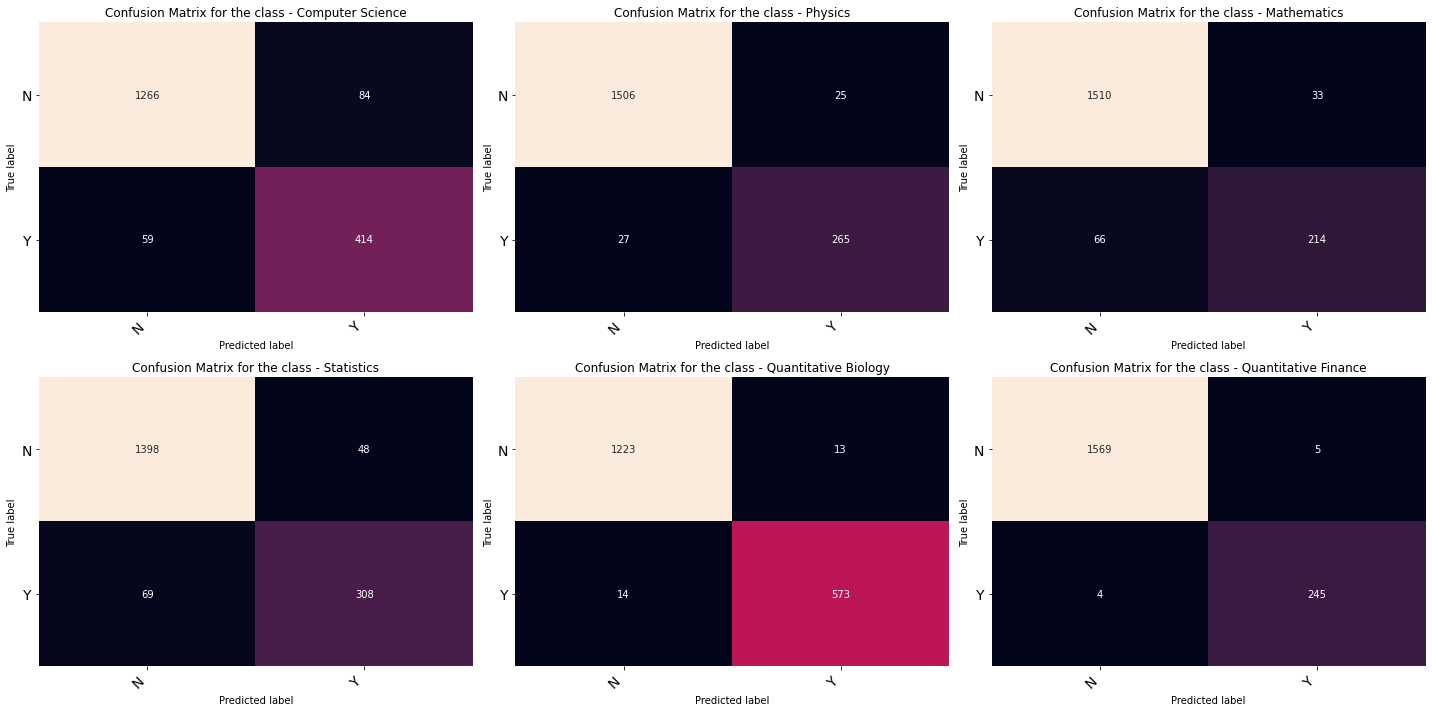

In [22]:
utils.draw_confusion_matrices(y_preds, Ys, classes, threshold, model_names)

ROC curve for Final Model


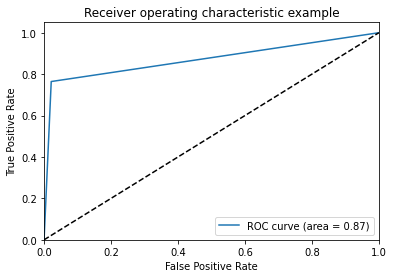

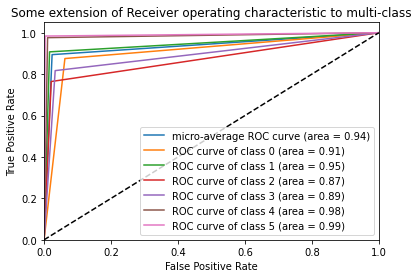

In [23]:
utils.draw_rocs(y_preds, Ys, classes, threshold, model_names)

In [24]:
utils.print_classification_reports(y_preds, Ys, classes, threshold, model_names)

Classification for Final Model  : 
                       precision    recall  f1-score   support

    Computer Science       0.83      0.88      0.85       473
             Physics       0.91      0.91      0.91       292
         Mathematics       0.87      0.76      0.81       280
          Statistics       0.87      0.82      0.84       377
Quantitative Biology       0.98      0.98      0.98       587
Quantitative Finance       0.98      0.98      0.98       249

           micro avg       0.91      0.89      0.90      2258
           macro avg       0.91      0.89      0.90      2258
        weighted avg       0.91      0.89      0.90      2258
         samples avg       0.93      0.92      0.91      2258



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion

The initial problem was to build a model to predict the topics a research paper belongs to given the title and abstract.

The evalution of the model clearly shows that the model is pretty good at predicting the labels.

The high scores on Quantitative Biology & Quantitative science is due to the duplication of entries for both validation and training. This choice was made to compensate for the fact both of those classes have very low contribution to the dataset.